<a href="https://colab.research.google.com/github/lakmg2007/SCALAR_LEARNINGS/blob/main/ImprovingRegressionResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given the 1d input features X and target Y. Use Gradient descent to get the optimal weights for the Linear regression model that uses Mean Squared Error(MSE) with L2 regularization.
The hypothesis function for Linear regression is Y_hat = wX + b.
The cost function = L(w)=
2n
1
​
 (∑
i=1
n
​
 (y
hat
i
​
 −y
i
 )
2
 +λ∑
j=1
d
​
 (w
j
2
​
 ))

Use the below functions to compute the gradient for a single weight w and bias b :

1. w's gradient =  
n
1
​
 ∑
i=1
n
​
 ((Y
hat
i
​
 −Y
i
 )x
i
 +λw)
2. b's gradient =  
n
1
​
 ∑
i=1
n
​
 (Y
hat
i
​
 −Y
i
 )

n is the number of samples,
d is the number of features,
λ here is the regularization parameter.
Complete the function to perform L2 regularization and return new updated weight w and bias b , rounded up to 2-decimal places.

Input Format:

Number of testcases.
For each testcase there will be two lines first will contain w and the second will be b.
Output Format:

For each testcase return the new updated weight w and bias b, rounded up to 2 decimal points

In [ ]:
import numpy as np

def L2_reg_update_weights(w, b, X, Y, learning_rate, lambda_value=1):
    """input: w is the coefficient of x in form of an integer.
              b is the constant term, integer format.
              X is a python list of input variables.
              Y is a python list of the output variables.
              learning_rate is in the form of float.
              lambda_value is an integer which is actually the penalty term in l2 regularization.
        output: You are required to return updated m and b upto two decimal points, in the same line.
    """

    X = np.asarray(X)
    Y = np.asarray(Y)

    n = len(X)
    Y_hat = w * X + b


    w_deriv = (1/n) * np.sum((Y_hat - Y) * X) + lambda_value * w
    b_deriv = (1/n) * np.sum(Y_hat - Y)


    # Update weights
    w -= learning_rate * w_deriv
    b -= learning_rate * b_deriv

    return(round(w, 2), round(b, 2))



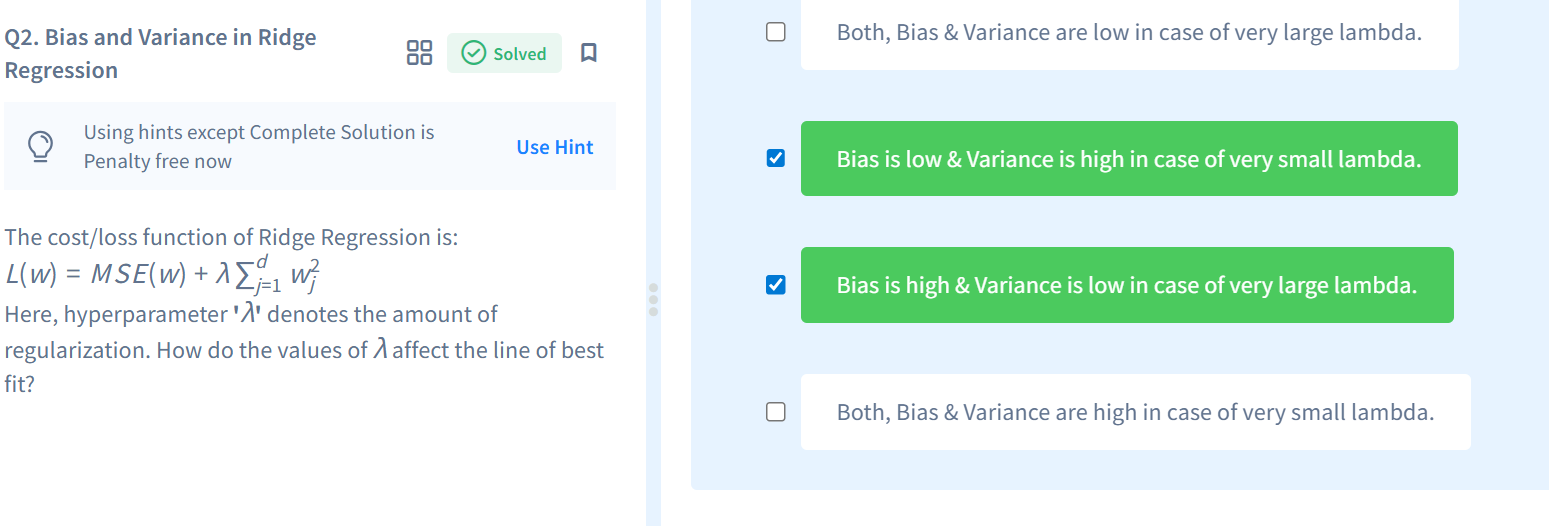

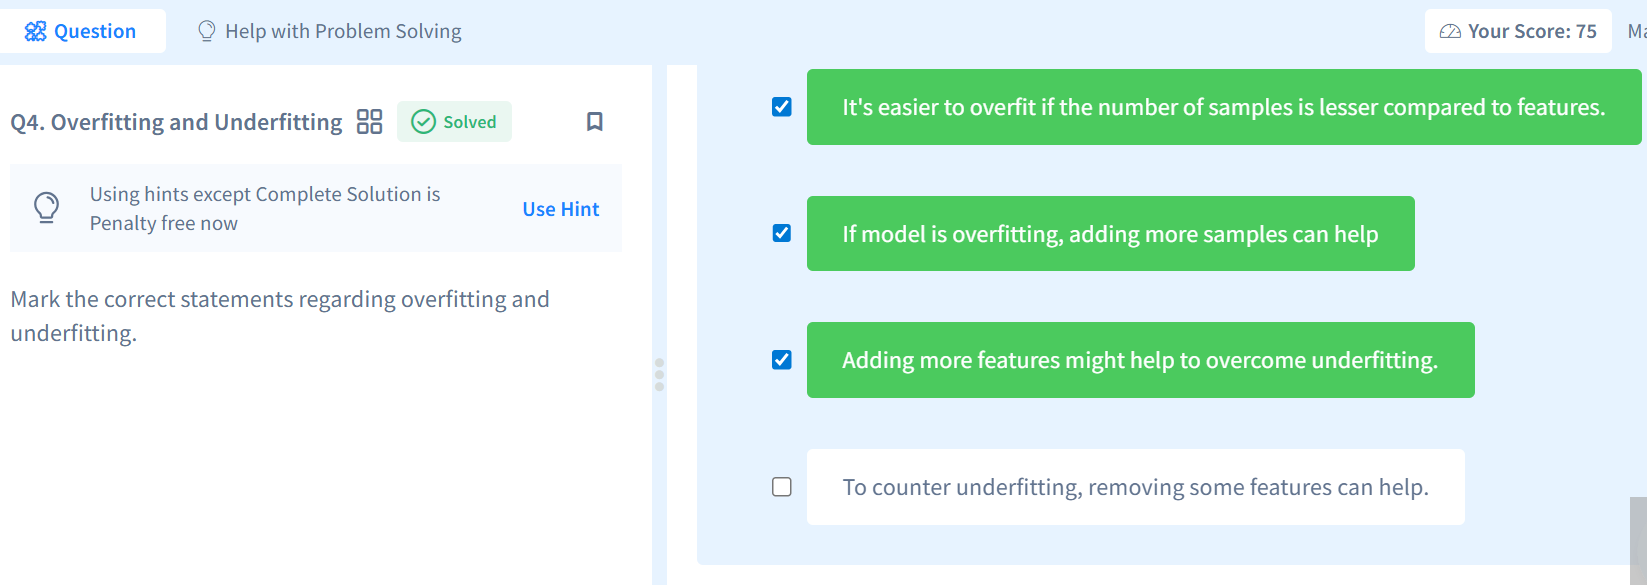

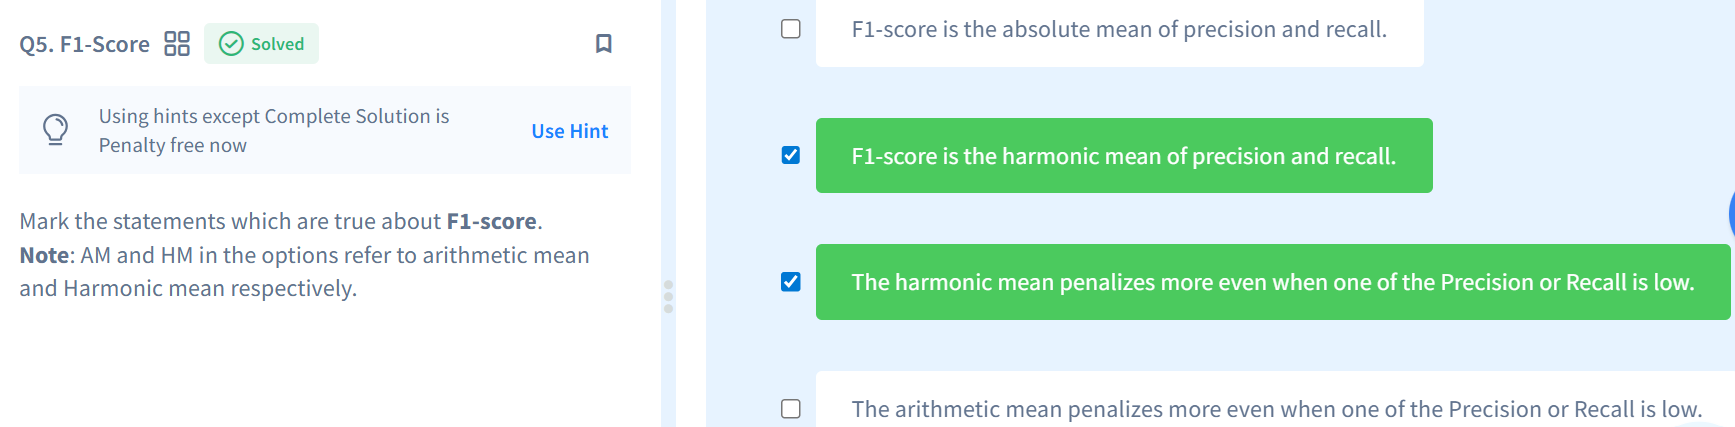

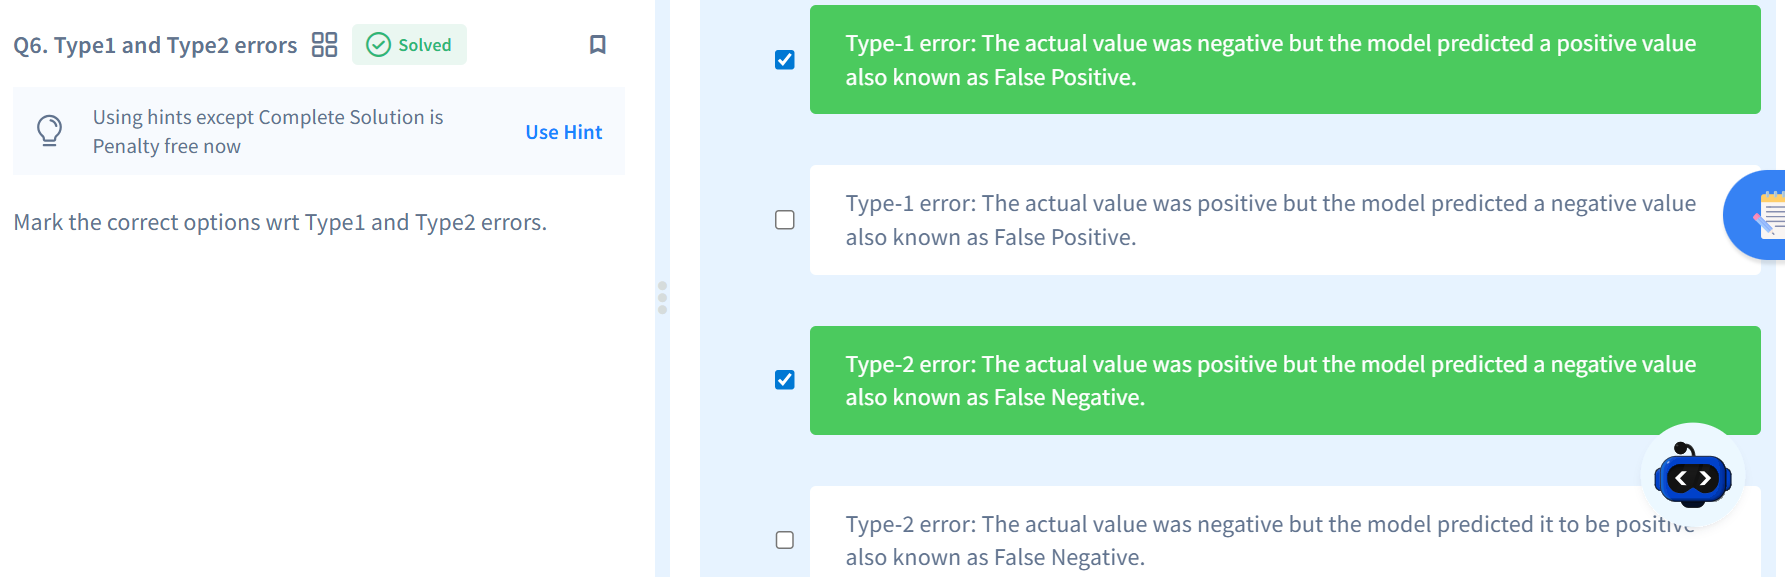

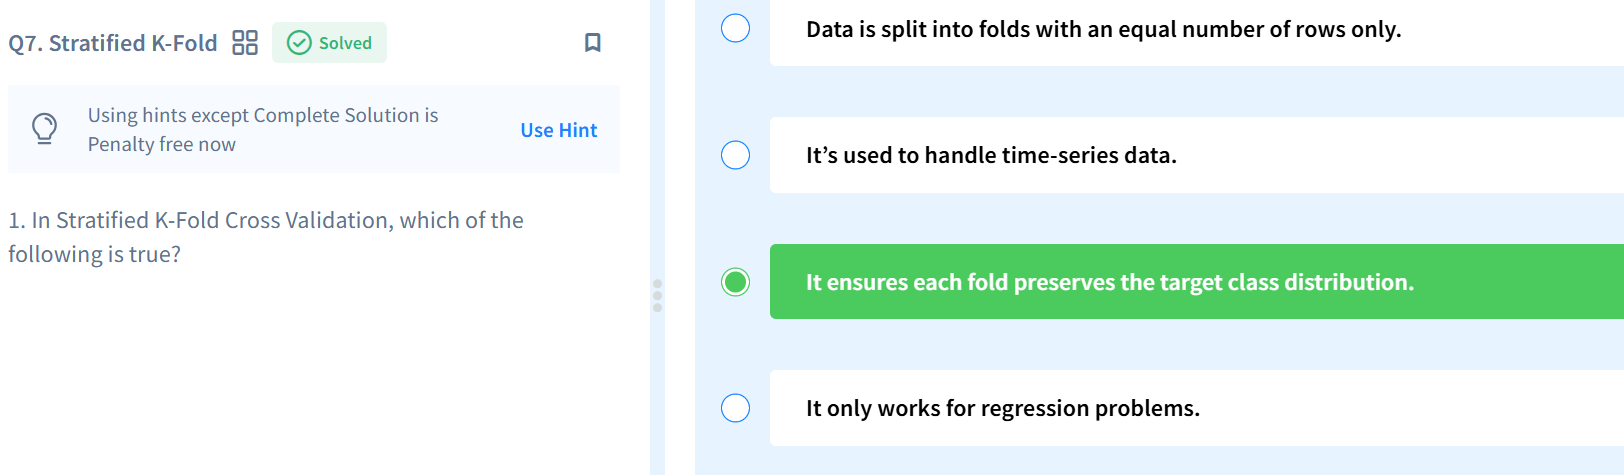

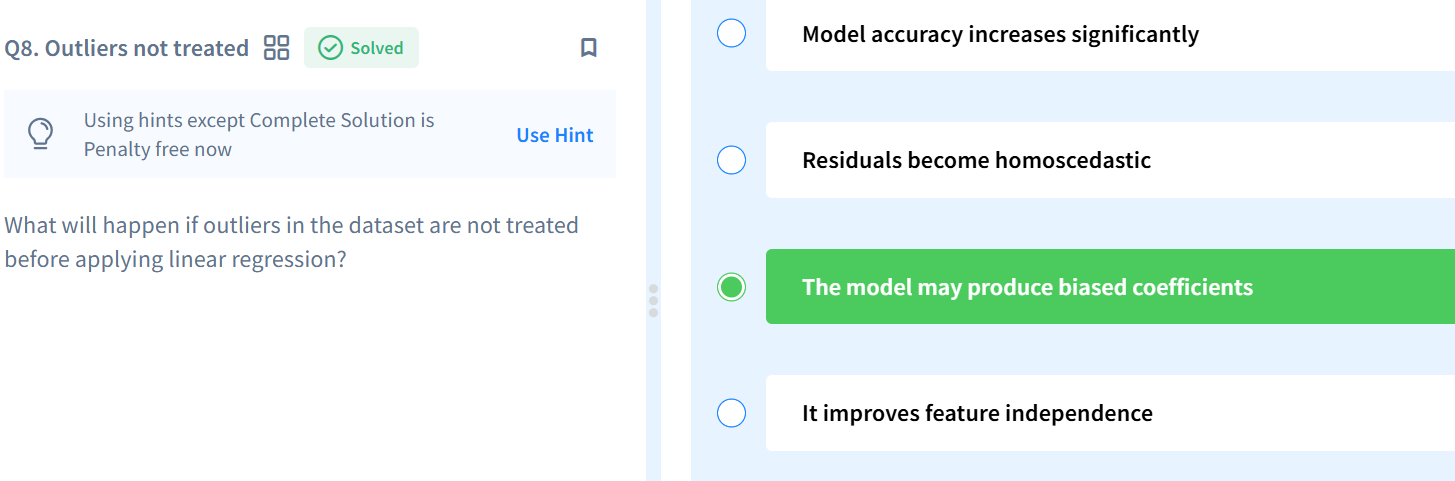

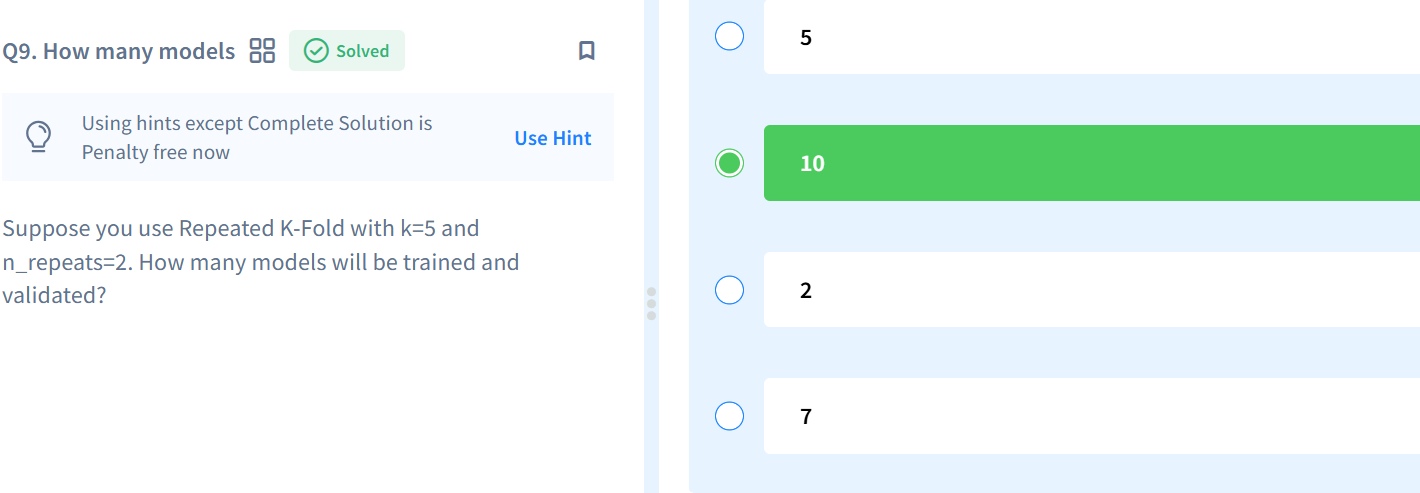

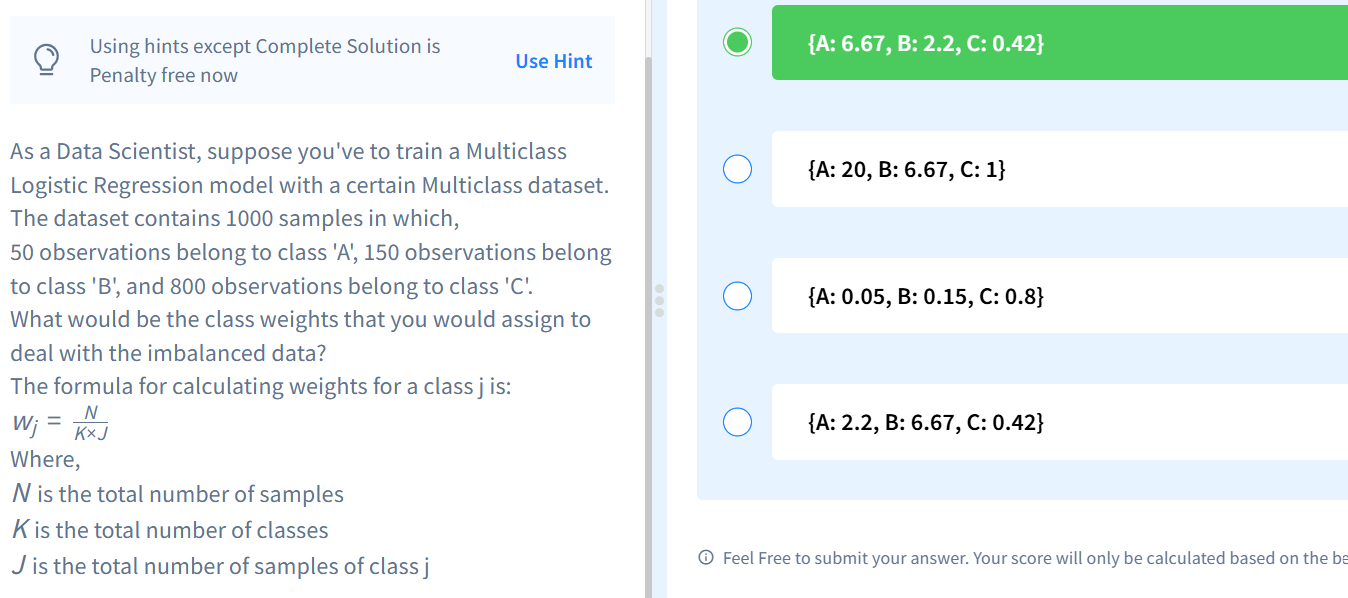

# **Q1. AU-ROC implementation **

Given a dataframe consisting of predicted probabilities and true labels of the observations, return the AU-ROC rounded off to two decimal places after implementing AU-ROC from scratch.

Input Format:

Two lists consisting of predicted probabilities and true labels for each observation, respectively.
Output Format:

AU-ROC score rounded off to two decimal places
Sample Input:

probab = [0.64, 0.01, 0.22, 0.44, 0.02, 0.64, 0.87, 0. , 0.06, 0.8 ]
labels = [1, 0, 1, 1, 0, 0, 1, 1, 0, 0]
Sample Output:

0.58

Sample Explanation:

1. Considering 0.64 as threshold, therefore y_pred =[1,0,0,0,0,1,1,0,0,1]

2. Compute True Positive, False Positive, False Negative and True Negative

3. Calculate True Positive Rate and False Positive Rate

4. Now repeat step 1 with a different threshold

In [ ]:
import pandas as pd
import numpy as np
def au_roc(prob, labels):

    data = pd.DataFrame({"probab" : prob, "y" : labels})

    #storing all the threshold values sorted in descending order
    thr=  list(set(data['probab']))
    thr.sort(reverse = True)

    tpr_arr,fpr_arr = [],[]

    for i in thr:
        #adding new column y_pred based on probability score and threshold
        data['y_pred'] = data['probab'].apply(lambda y_score: 0 if y_score < i else 1)

        #calculate true negatives, false positives, false negatives and true positives
        tn = len(data[(data.y == 0) & (data.y_pred == 0)])
        fp = len(data[(data.y== 0) & (data.y_pred == 1)])
        fn = len(data[(data.y == 1) & (data.y_pred == 0)])
        tp = len(data[(data.y == 1) & (data.y_pred == 1)])

        #calculate true positive rate and false positive rate
        tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) != 0 else 0

        tpr_arr.append(tpr)
        fpr_arr.append(fpr)

    #Calculating the area under curve using trapz function
    auroc = np.trapz(tpr_arr, fpr_arr)
    return auroc.round(2)